## 京都府の人口についてのメッシュマップ

必要なライブラリのインポート

In [1]:
import geopandas as gpd
import pandas as pd
import contextily as ctx
import plotly.express as px
import contextily as cx
import numpy as np

import matplotlib as mpl

mpl.rc('font',family='Hiragino Maru Gothic Pro')

データフレームの作成

In [4]:
kyotomesh1 = gpd.read_file('data/京都1')
kyotomesh2 = gpd.read_file('data/京都2')
kyotomesh3 = gpd.read_file('data/京都3')
kyotomesh4 = gpd.read_file('data/京都4')
kyotomesh5 = gpd.read_file('data/京都5')

データフレームの統合

In [5]:
kyotomesh=gpd.pd.concat([kyotomesh1,kyotomesh2,kyotomesh3,kyotomesh4,kyotomesh5])

区画だけのメッシュマップ

<Axes: >

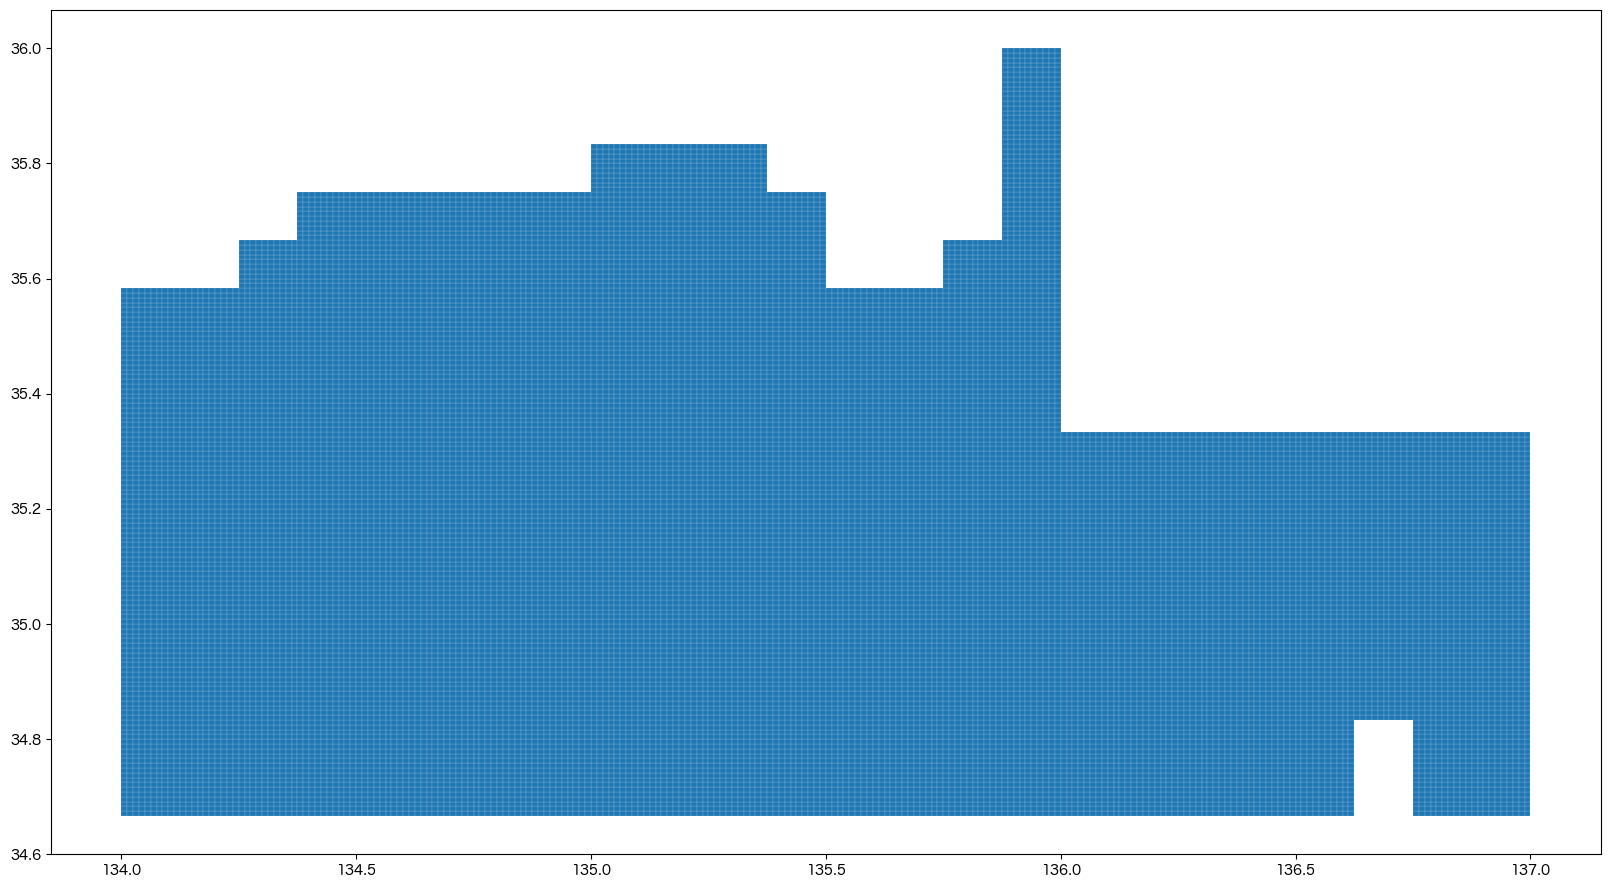

In [6]:
kyotomesh.plot(figsize=(20,20),edgecolor='white',linewidth=0.1)

国勢調査のデータフレームの作成

In [7]:
kyotodata1=pd.read_csv('data/kyoto1.txt', encoding='cp932')
kyotodata2=pd.read_csv('data/kyoto2.txt', encoding='cp932')
kyotodata3=pd.read_csv('data/kyoto3.txt', encoding='cp932')
kyotodata4=pd.read_csv('data/kyoto4.txt', encoding='cp932')
kyotodata5=pd.read_csv('data/kyoto5.txt', encoding='cp932')

データフレームがきちんとできているかの確認

In [8]:
kyotodata1.head()

,KEY_CODE,HTKSYORI,HTKSAKI,GASSAN,T001100001,T001100002,T001100003,T001100004,T001100005,T001100006,...,T001100041,T001100042,T001100043,T001100044,T001100045,T001100046,T001100047,T001100048,T001100049,T001100050
0,NaN,NaN,NaN,NaN,人口（総数）,人口（総数） 男,人口（総数） 女,０～１４歳人口 総数,０～１４歳人口 男,０～１４歳人口 女,...,６人世帯数 一般世帯数,７人以上世帯数 一般世帯数,親族のみの世帯数 一般世帯数,核家族世帯数 一般世帯数,核家族以外の世帯数 一般世帯数,６歳未満世帯員のいる世帯数 一般世帯数,６５歳以上世帯員のいる世帯数 一般世帯数,世帯主の年齢が２０～２９歳の１人世帯数 一般世帯数,高齢単身世帯数 一般世帯数,高齢夫婦世帯数 一般世帯数
1,53350000.0,0.0,NaN,NaN,85,44,41,8,4,4,...,1,0,26,18,8,3,21,0,4,7
2,53350002.0,1.0,NaN,53350012,29,16,13,2,0,2,...,0,0,10,9,1,1,13,0,4,4
3,53350003.0,0.0,NaN,NaN,24,9,15,3,0,3,...,1,0,8,6,2,1,10,0,2,4
4,53350005.0,0.0,NaN,NaN,201,98,103,39,20,19,...,2,1,59,51,8,9,35,0,9,13


データフレームの余分な一行目を削除

In [9]:
kyotodata1=kyotodata1.drop(0,axis=0)
kyotodata2=kyotodata2.drop(0,axis=0)
kyotodata3=kyotodata3.drop(0,axis=0)
kyotodata4=kyotodata4.drop(0,axis=0)
kyotodata5=kyotodata5.drop(0,axis=0)

確認

In [10]:
kyotodata1.head()

,KEY_CODE,HTKSYORI,HTKSAKI,GASSAN,T001100001,T001100002,T001100003,T001100004,T001100005,T001100006,...,T001100041,T001100042,T001100043,T001100044,T001100045,T001100046,T001100047,T001100048,T001100049,T001100050
1,53350000.0,0.0,NaN,NaN,85,44,41,8,4,4,...,1,0,26,18,8,3,21,0,4,7
2,53350002.0,1.0,NaN,53350012,29,16,13,2,0,2,...,0,0,10,9,1,1,13,0,4,4
3,53350003.0,0.0,NaN,NaN,24,9,15,3,0,3,...,1,0,8,6,2,1,10,0,2,4
4,53350005.0,0.0,NaN,NaN,201,98,103,39,20,19,...,2,1,59,51,8,9,35,0,9,13
5,53350006.0,0.0,NaN,NaN,479,229,250,59,36,23,...,5,3,148,121,27,15,123,0,32,44


＊を読み取れる値に変更

In [11]:
kyotodata1=kyotodata1.replace('*',np.NaN)
kyotodata2=kyotodata2.replace('*',np.NaN)
kyotodata3=kyotodata3.replace('*',np.NaN)
kyotodata4=kyotodata4.replace('*',np.NaN)
kyotodata5=kyotodata5.replace('*',np.NaN)

確認

In [12]:
kyotodata1

,KEY_CODE,HTKSYORI,HTKSAKI,GASSAN,T001100001,T001100002,T001100003,T001100004,T001100005,T001100006,...,T001100041,T001100042,T001100043,T001100044,T001100045,T001100046,T001100047,T001100048,T001100049,T001100050
1,53350000.0,0.0,NaN,NaN,85,44,41,8,4,4,...,1,0,26,18,8,3,21,0,4,7
2,53350002.0,1.0,NaN,53350012,29,16,13,2,0,2,...,0,0,10,9,1,1,13,0,4,4
3,53350003.0,0.0,NaN,NaN,24,9,15,3,0,3,...,1,0,8,6,2,1,10,0,2,4
4,53350005.0,0.0,NaN,NaN,201,98,103,39,20,19,...,2,1,59,51,8,9,35,0,9,13
5,53350006.0,0.0,NaN,NaN,479,229,250,59,36,23,...,5,3,148,121,27,15,123,0,32,44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1329,53357778.0,1.0,NaN,53357777,24,9,15,0,0,0,...,0,0,6,6,0,0,16,0,12,2
1330,53357786.0,2.0,53357787.0,NaN,2,1,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1331,53357787.0,1.0,NaN,53357786,74,35,39,8,4,4,...,4,0,20,13,7,1,23,0,5,3
1332,53357797.0,0.0,NaN,NaN,20,10,10,1,1,0,...,0,1,5,3,2,1,5,0,0,1


データフレームの統合

In [13]:
kyotodata = pd.concat([kyotodata1,kyotodata2,kyotodata3,kyotodata4,kyotodata5])

確認

In [14]:
kyotodata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14344 entries, 1 to 3572
Data columns (total 54 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   KEY_CODE    14344 non-null  float64
 1   HTKSYORI    14344 non-null  float64
 2   HTKSAKI     1419 non-null   float64
 3   GASSAN      1204 non-null   object 
 4   T001100001  14344 non-null  object 
 5   T001100002  14344 non-null  object 
 6   T001100003  14344 non-null  object 
 7   T001100004  12925 non-null  object 
 8   T001100005  12925 non-null  object 
 9   T001100006  12925 non-null  object 
 10  T001100007  12925 non-null  object 
 11  T001100008  12925 non-null  object 
 12  T001100009  12925 non-null  object 
 13  T001100010  12925 non-null  object 
 14  T001100011  12925 non-null  object 
 15  T001100012  12925 non-null  object 
 16  T001100013  12925 non-null  object 
 17  T001100014  12925 non-null  object 
 18  T001100015  12925 non-null  object 
 19  T001100016  12925 non-null  obj

カラムの確認

In [15]:
kyotodata.columns

Index(['KEY_CODE', 'HTKSYORI', 'HTKSAKI', 'GASSAN', 'T001100001', 'T001100002',
       'T001100003', 'T001100004', 'T001100005', 'T001100006', 'T001100007',
       'T001100008', 'T001100009', 'T001100010', 'T001100011', 'T001100012',
       'T001100013', 'T001100014', 'T001100015', 'T001100016', 'T001100017',
       'T001100018', 'T001100019', 'T001100020', 'T001100021', 'T001100022',
       'T001100023', 'T001100024', 'T001100025', 'T001100026', 'T001100027',
       'T001100028', 'T001100029', 'T001100030', 'T001100031', 'T001100032',
       'T001100033', 'T001100034', 'T001100035', 'T001100036', 'T001100037',
       'T001100038', 'T001100039', 'T001100040', 'T001100041', 'T001100042',
       'T001100043', 'T001100044', 'T001100045', 'T001100046', 'T001100047',
       'T001100048', 'T001100049', 'T001100050'],
      dtype='object')

In [16]:
kyotodata.columns[4:]

Index(['T001100001', 'T001100002', 'T001100003', 'T001100004', 'T001100005',
       'T001100006', 'T001100007', 'T001100008', 'T001100009', 'T001100010',
       'T001100011', 'T001100012', 'T001100013', 'T001100014', 'T001100015',
       'T001100016', 'T001100017', 'T001100018', 'T001100019', 'T001100020',
       'T001100021', 'T001100022', 'T001100023', 'T001100024', 'T001100025',
       'T001100026', 'T001100027', 'T001100028', 'T001100029', 'T001100030',
       'T001100031', 'T001100032', 'T001100033', 'T001100034', 'T001100035',
       'T001100036', 'T001100037', 'T001100038', 'T001100039', 'T001100040',
       'T001100041', 'T001100042', 'T001100043', 'T001100044', 'T001100045',
       'T001100046', 'T001100047', 'T001100048', 'T001100049', 'T001100050'],
      dtype='object')

カラムをオブジェクトからフロートに変換

In [17]:
kyotodata[kyotodata.columns[4:]].astype(float)

,T001100001,T001100002,T001100003,T001100004,T001100005,T001100006,T001100007,T001100008,T001100009,T001100010,...,T001100041,T001100042,T001100043,T001100044,T001100045,T001100046,T001100047,T001100048,T001100049,T001100050
1,85.0,44.0,41.0,8.0,4.0,4.0,77.0,40.0,37.0,42.0,...,1.0,0.0,26.0,18.0,8.0,3.0,21.0,0.0,4.0,7.0
2,29.0,16.0,13.0,2.0,0.0,2.0,31.0,18.0,13.0,12.0,...,0.0,0.0,10.0,9.0,1.0,1.0,13.0,0.0,4.0,4.0
3,24.0,9.0,15.0,3.0,0.0,3.0,21.0,9.0,12.0,8.0,...,1.0,0.0,8.0,6.0,2.0,1.0,10.0,0.0,2.0,4.0
4,201.0,98.0,103.0,39.0,20.0,19.0,162.0,78.0,84.0,113.0,...,2.0,1.0,59.0,51.0,8.0,9.0,35.0,0.0,9.0,13.0
5,479.0,229.0,250.0,59.0,36.0,23.0,420.0,193.0,227.0,237.0,...,5.0,3.0,148.0,121.0,27.0,15.0,123.0,0.0,32.0,44.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3568,77.0,39.0,38.0,3.0,2.0,1.0,75.0,37.0,38.0,33.0,...,2.0,0.0,26.0,23.0,3.0,1.0,28.0,0.0,9.0,11.0
3569,81.0,41.0,40.0,6.0,2.0,4.0,75.0,39.0,36.0,41.0,...,0.0,1.0,27.0,20.0,7.0,2.0,22.0,0.0,1.0,9.0
3570,63.0,39.0,24.0,6.0,3.0,3.0,57.0,36.0,21.0,32.0,...,0.0,0.0,16.0,12.0,4.0,2.0,16.0,13.0,4.0,5.0
3571,23.0,9.0,14.0,0.0,0.0,0.0,23.0,9.0,14.0,20.0,...,0.0,0.0,5.0,3.0,2.0,0.0,2.0,7.0,0.0,0.0


変換の適用

In [18]:
kyotodata[kyotodata.columns[4:]]=kyotodata[kyotodata.columns[4:]].astype(float)

確認

In [19]:
kyotodata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14344 entries, 1 to 3572
Data columns (total 54 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   KEY_CODE    14344 non-null  float64
 1   HTKSYORI    14344 non-null  float64
 2   HTKSAKI     1419 non-null   float64
 3   GASSAN      1204 non-null   object 
 4   T001100001  14344 non-null  float64
 5   T001100002  14344 non-null  float64
 6   T001100003  14344 non-null  float64
 7   T001100004  12925 non-null  float64
 8   T001100005  12925 non-null  float64
 9   T001100006  12925 non-null  float64
 10  T001100007  12925 non-null  float64
 11  T001100008  12925 non-null  float64
 12  T001100009  12925 non-null  float64
 13  T001100010  12925 non-null  float64
 14  T001100011  12925 non-null  float64
 15  T001100012  12925 non-null  float64
 16  T001100013  12925 non-null  float64
 17  T001100014  12925 non-null  float64
 18  T001100015  12925 non-null  float64
 19  T001100016  12925 non-null  flo

データの結合

In [20]:
kyotomesh['KEY_CODE']=kyotomesh['KEY_CODE'].astype(float)

In [21]:
kyotomesh=kyotomesh.merge(kyotodata,on='KEY_CODE')

確認

In [22]:
kyotomesh.sample(5)

,KEY_CODE,MESH1_ID,MESH2_ID,MESH3_ID,OBJ_ID,geometry,HTKSYORI,HTKSAKI,GASSAN,T001100001,...,T001100041,T001100042,T001100043,T001100044,T001100045,T001100046,T001100047,T001100048,T001100049,T001100050
10704,52366188.0,5236,61,88,4789,"POLYGON ((136.23750 35.23333, 136.22500 35.233...",0.0,NaN,NaN,1245.0,...,11.0,1.0,379.0,321.0,58.0,28.0,282.0,8.0,53.0,98.0
4578,52340778.0,5234,07,78,779,"POLYGON ((134.98750 34.72500, 134.97500 34.725...",0.0,NaN,NaN,53.0,...,0.0,1.0,18.0,16.0,2.0,1.0,17.0,0.0,2.0,9.0
4038,52357206.0,5235,72,06,5807,"POLYGON ((135.33750 35.25000, 135.32500 35.250...",2.0,52357207.0,NaN,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8506,52361783.0,5236,17,83,1384,"POLYGON ((136.92500 34.81667, 136.91250 34.816...",0.0,NaN,NaN,990.0,...,8.0,2.0,274.0,232.0,42.0,26.0,197.0,31.0,43.0,67.0
3229,52355318.0,5235,53,18,4319,"POLYGON ((135.48750 35.09167, 135.47500 35.091...",0.0,NaN,NaN,1969.0,...,10.0,4.0,567.0,527.0,40.0,84.0,224.0,42.0,42.0,81.0


メルカトル図方に指定

In [23]:
kyotomesh=kyotomesh.to_crs(3857)

総人口のメッシュマップの作成

<Axes: >

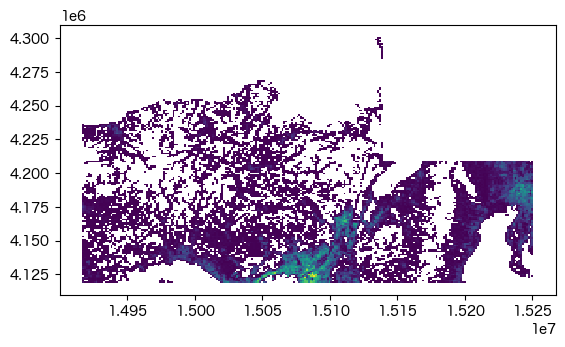

In [24]:
kyotomesh.plot(column='T001100001')

人口の多い順に整頓

In [27]:
kyotomesh0=kyotomesh.sort_values(by='T001100001', ascending=False )
kyotomesh0

,KEY_CODE,MESH1_ID,MESH2_ID,MESH3_ID,OBJ_ID,geometry,HTKSYORI,HTKSAKI,GASSAN,T001100001,...,T001100041,T001100042,T001100043,T001100044,T001100045,T001100046,T001100047,T001100048,T001100049,T001100050
353,52350452.0,5235,04,52,453,"POLYGON ((15087965.483 4124315.112, 15086573.9...",0.0,NaN,NaN,29033.0,...,48.0,12.0,7129.0,6770.0,359.0,1054.0,4538.0,1517.0,1886.0,1212.0
344,52350443.0,5235,04,43,444,"POLYGON ((15089356.977 4123186.710, 15087965.4...",0.0,NaN,NaN,28730.0,...,56.0,22.0,7390.0,7042.0,348.0,1273.0,4206.0,1316.0,1881.0,1007.0
241,52350338.0,5235,03,38,339,"POLYGON ((15082399.509 4122058.421, 15081008.0...",0.0,NaN,NaN,27706.0,...,44.0,15.0,6839.0,6460.0,379.0,1579.0,3042.0,2036.0,1157.0,763.0
351,52350450.0,5235,04,50,451,"POLYGON ((15085182.496 4124315.112, 15083791.0...",0.0,NaN,NaN,26532.0,...,37.0,12.0,5140.0,4812.0,328.0,819.0,3254.0,2282.0,1557.0,698.0
355,52350454.0,5235,04,54,455,"POLYGON ((15090748.471 4124315.112, 15089356.9...",0.0,NaN,NaN,25187.0,...,56.0,7.0,7173.0,6798.0,375.0,954.0,5034.0,395.0,2039.0,1414.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3831,52356569.0,5235,65,69,5370,"POLYGON ((15111620.875 4193364.400, 15110229.3...",2.0,52356549.0,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7404,52346150.0,5234,61,50,4951,"POLYGON ((14932118.196 4192228.977, 14930726.7...",2.0,52346151.0,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4480,52340422.0,5234,04,22,423,"POLYGON ((14976645.993 4120930.246, 14975254.4...",2.0,52340412.0,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5936,52343205.0,5234,32,05,2606,"POLYGON ((14952990.601 4152562.236, 14951599.1...",2.0,52343227.0,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


確認

In [28]:
kyotomesh0.head(10)

,KEY_CODE,MESH1_ID,MESH2_ID,MESH3_ID,OBJ_ID,geometry,HTKSYORI,HTKSAKI,GASSAN,T001100001,...,T001100041,T001100042,T001100043,T001100044,T001100045,T001100046,T001100047,T001100048,T001100049,T001100050
353,52350452.0,5235,04,52,453,"POLYGON ((15087965.483 4124315.112, 15086573.9...",0.0,NaN,NaN,29033.0,...,48.0,12.0,7129.0,6770.0,359.0,1054.0,4538.0,1517.0,1886.0,1212.0
344,52350443.0,5235,04,43,444,"POLYGON ((15089356.977 4123186.710, 15087965.4...",0.0,NaN,NaN,28730.0,...,56.0,22.0,7390.0,7042.0,348.0,1273.0,4206.0,1316.0,1881.0,1007.0
241,52350338.0,5235,03,38,339,"POLYGON ((15082399.509 4122058.421, 15081008.0...",0.0,NaN,NaN,27706.0,...,44.0,15.0,6839.0,6460.0,379.0,1579.0,3042.0,2036.0,1157.0,763.0
351,52350450.0,5235,04,50,451,"POLYGON ((15085182.496 4124315.112, 15083791.0...",0.0,NaN,NaN,26532.0,...,37.0,12.0,5140.0,4812.0,328.0,819.0,3254.0,2282.0,1557.0,698.0
355,52350454.0,5235,04,54,455,"POLYGON ((15090748.471 4124315.112, 15089356.9...",0.0,NaN,NaN,25187.0,...,56.0,7.0,7173.0,6798.0,375.0,954.0,5034.0,395.0,2039.0,1414.0
342,52350441.0,5235,04,41,442,"POLYGON ((15086573.990 4123186.710, 15085182.4...",0.0,NaN,NaN,25090.0,...,24.0,9.0,5639.0,5355.0,284.0,920.0,3837.0,1584.0,1742.0,982.0
343,52350442.0,5235,04,42,443,"POLYGON ((15087965.483 4123186.710, 15086573.9...",0.0,NaN,NaN,25052.0,...,46.0,11.0,5616.0,5203.0,413.0,782.0,4318.0,1618.0,1988.0,988.0
290,52350389.0,5235,03,89,390,"POLYGON ((15083791.002 4127701.001, 15082399.5...",0.0,NaN,NaN,24458.0,...,28.0,7.0,5707.0,5372.0,335.0,785.0,4073.0,1881.0,1768.0,1025.0
181,52350262.0,5235,02,62,263,"POLYGON ((15060135.611 4125443.628, 15058744.1...",0.0,NaN,NaN,24432.0,...,41.0,3.0,6666.0,6415.0,251.0,965.0,4032.0,511.0,1635.0,1205.0
363,52350462.0,5235,04,62,463,"POLYGON ((15087965.483 4125443.628, 15086573.9...",0.0,NaN,NaN,23846.0,...,67.0,11.0,6632.0,6262.0,370.0,855.0,4257.0,317.0,1616.0,1200.0


人口が多い地区をマークしたマップ

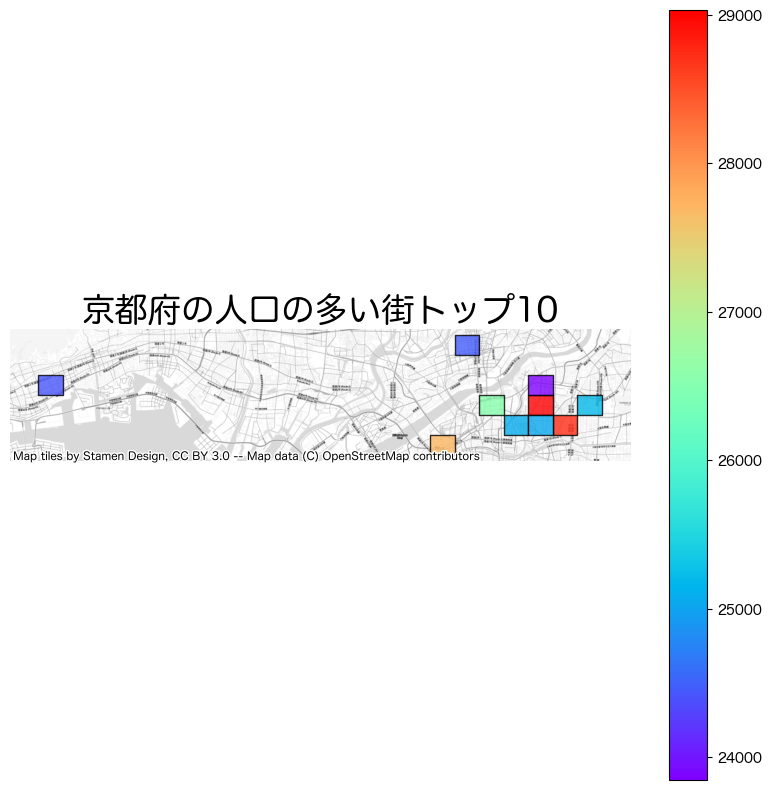

In [30]:
ax = kyotomesh0.head(10).plot(figsize=(10,10),
         column='T001100001',
         legend=True,
         cmap='rainbow',
         edgecolor='black',
         linewidth=1,
         alpha=0.8)

ax.axis('off')

ax.set_title('京都府の人口の多い街トップ10',fontsize=24);

cx.add_basemap(ax,source=cx.providers.Stamen.TonerLite)

０〜１４歳の人口でのメッシュマップ

<Axes: >

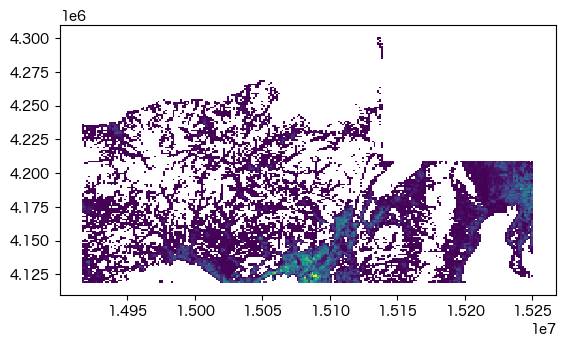

In [31]:
kyotomesh.plot(column='T001100004')

０〜１４歳の人口が多い順に整頓

In [33]:
kyotomesh01=kyotomesh.sort_values(by='T001100004', ascending=False )
kyotomesh01

,KEY_CODE,MESH1_ID,MESH2_ID,MESH3_ID,OBJ_ID,geometry,HTKSYORI,HTKSAKI,GASSAN,T001100001,...,T001100041,T001100042,T001100043,T001100044,T001100045,T001100046,T001100047,T001100048,T001100049,T001100050
345,52350444.0,5235,04,44,445,"POLYGON ((15090748.471 4123186.710, 15089356.9...",0.0,NaN,NaN,23147.0,...,50.0,11.0,6309.0,6026.0,283.0,1092.0,3424.0,456.0,1446.0,914.0
344,52350443.0,5235,04,43,444,"POLYGON ((15089356.977 4123186.710, 15087965.4...",0.0,NaN,NaN,28730.0,...,56.0,22.0,7390.0,7042.0,348.0,1273.0,4206.0,1316.0,1881.0,1007.0
241,52350338.0,5235,03,38,339,"POLYGON ((15082399.509 4122058.421, 15081008.0...",0.0,NaN,NaN,27706.0,...,44.0,15.0,6839.0,6460.0,379.0,1579.0,3042.0,2036.0,1157.0,763.0
353,52350452.0,5235,04,52,453,"POLYGON ((15087965.483 4124315.112, 15086573.9...",0.0,NaN,NaN,29033.0,...,48.0,12.0,7129.0,6770.0,359.0,1054.0,4538.0,1517.0,1886.0,1212.0
355,52350454.0,5235,04,54,455,"POLYGON ((15090748.471 4124315.112, 15089356.9...",0.0,NaN,NaN,25187.0,...,56.0,7.0,7173.0,6798.0,375.0,954.0,5034.0,395.0,2039.0,1414.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14311,53354728.0,5335,47,28,3429,"POLYGON ((15138059.254 4257135.556, 15136667.7...",2.0,53354738.0,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14315,53354768.0,5335,47,68,3469,"POLYGON ((15138059.254 4261704.852, 15136667.7...",2.0,53354757.0,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14319,53355113.0,5335,51,13,3614,"POLYGON ((15047612.168 4267419.161, 15046220.6...",2.0,53355114.0,NaN,14.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14338,53357777.0,5335,77,77,4078,"POLYGON ((15136667.761 4297181.956, 15135276.2...",2.0,53357778.0,NaN,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


０〜１４歳の人口の人口が多い順にマッピング

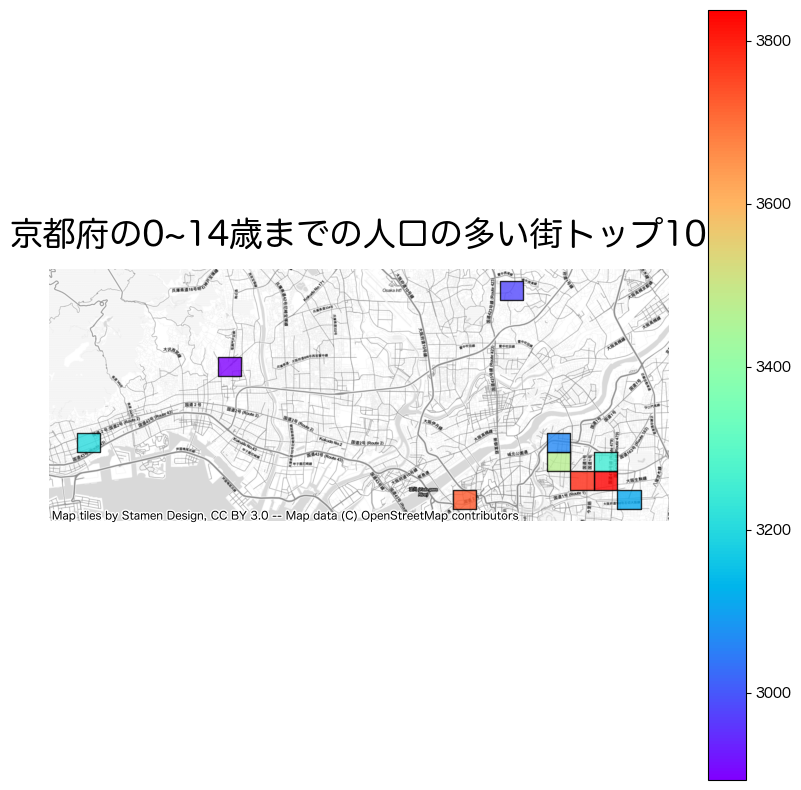

In [34]:
ax = kyotomesh01.head(10).plot(figsize=(10,10),
         column='T001100004',
         legend=True,
         cmap='rainbow',
         edgecolor='black',
         linewidth=1,
         alpha=0.8)

ax.axis('off')

ax.set_title('京都府の0~14歳までの人口の多い街トップ10',fontsize=24);

cx.add_basemap(ax,source=cx.providers.Stamen.TonerLite)

### 感想
今回は総人口と０〜１４歳の人口で分けてマップを作りました。総人口が多い地区と０〜１４歳の人口が多い地区が大きく異なり、さらに、０〜１４歳の人口ではtop10だけ見ても数の差が激しく一箇所に多く集中しているのがわかりました。そして、メッシュマップの方では、人が住んでいない地域が多いのか、千葉よりも白く映る場所が多かったです。後から調べて気づいたのですが、今回、陸続きの場所を選択したので京都だけではなく、大阪等の周りの地区も巻き込んで分析してしまいました。人口が多い地域はほとんど大阪で、一番上に映るグリットだけがおそらく京都だと思います。人が住んでいない地域は主に山だと思われます。